In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor
from sklearn import datasets
from sklearn.utils import shuffle
from scipy import stats
from sklearn.preprocessing import normalize


/home/lambda/lab/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [10]:
#PATH = "/home/lambda/lab/Metadata_v3"
PATH = "/home/lambda/lab/Metadata_V7G_sckit"
for file in os.listdir(PATH):
    break
a_ = np.load(os.path.join(PATH,file), allow_pickle=True)[()]
key_met = list(a_[list(a_.keys())[0]].keys())

def load_meta(N = 17, par = key_met):
    df = pd.read_csv("db_sample_201901221525.csv")
    Y = []
    X = []
    for file in os.listdir(PATH):
        lo = file.split(".")[0] + ".jpg"
        val = df.loc[df["imagename"]==lo, "ane_glo"].iloc[0]
        dictdata  = np.load(os.path.join(PATH,file), allow_pickle=True)[()]
        if len(dictdata)<N:
            print("Menor que ", N)
            continue
        Y.append(val)
        #print(file, val, type(dictdata))
        aux = []
        for i in range(N):
            nn = dictdata[i]
            for j in par:
            #aux.extend(nn["Per"].reshape(-1,).tolist())
                aux.extend(nn[j].reshape(-1,).tolist())

        
        X.append(aux)
    return np.array(X), np.array(Y)

# TEST

In [11]:
key_met

['rgb_mean',
 'rgb_std',
 'rgb_per',
 'rgb_mo',
 'lab_mean',
 'lab_std',
 'lab_per',
 'lab_mo',
 'hsv_mean',
 'hsv_std',
 'hsv_per',
 'hsv_mo',
 'LCh_mean',
 'LCh_std',
 'LCh_per',
 'LCh_mo',
 'lCh_std',
 'lCh_per',
 'lCh_mo',
 'x_mean',
 'x_std',
 'y_mean',
 'y_std',
 'N']

In [17]:
N = 5
from sklearn.model_selection import GridSearchCV
PATH = "/home/lambda/lab/Metadata_V7G_sckit"
bT = 0
#key_met = [line.strip() for line in open("meta.txt")]
df = pd.read_csv("db_sample_201901221525.csv")
Y = []
X = []
for file in os.listdir(PATH):
    lo = file.split("_")[1][:-4] + ".jpg"
    val = df.loc[df["imagename"]==lo, "ane_glo"].iloc[0]
    dictdata  = np.load(os.path.join(PATH,file), allow_pickle=True)[()]
    if len(dictdata)<N:
        #print("N menor a %d"% N)
        bT += 1
        continue
    if val>20 or val<5:
        continue
    Y.append(val)
    #print(file, val, type(dictdata))
    aux = []
    #print(type(dictdata))
    for i in dictdata.keys():
        nn = dictdata[i]
        aux.append(nn['rgb_mo'][0]) #R
        aux.append(nn['rgb_mo'][1]) #G
        aux.append(nn['hsv_mo'][2]) #V
        aux.append(nn['lab_mo'][0]) #L
        aux.append(nn['lab_mo'][1]) #A
        aux.append(nn['LCh_mo'][2])


    X.append(aux)
print(f"Total de datos menor a 5 : {bT} de {len(X)}")


Total de datos menor a 5:601 de 5585


In [18]:
X = np.array(X)
y = np.array(Y)
print(X.shape, y.shape)
#X = normalize(X)

(5585, 30) (5585,)


In [30]:
key_met

['rgb_mean',
 'rgb_std',
 'rgb_per',
 'rgb_mo',
 'lab_mean',
 'lab_std',
 'lab_per',
 'lab_mo',
 'hsv_mean',
 'hsv_std',
 'hsv_per',
 'hsv_mo',
 'LCh_mean',
 'LCh_std',
 'LCh_per',
 'LCh_mo',
 'lCh_std',
 'lCh_per',
 'lCh_mo',
 'x_mean',
 'x_std',
 'y_mean',
 'y_std',
 'N']

In [60]:
z_scores = stats.zscore(X)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 2).all(axis=1)
new_X = X[filtered_entries]
new_y = y[filtered_entries]

(781,)

In [61]:
new_X.shape, new_y.shape

((445, 85), (445,))

In [11]:
RR = X[:, 0::5]
GG = X[:, 1::5]
VV = X[:, 2::5]
LL = X[:, 3::5]
AA = X[:, 4::5]


In [12]:
np.max(np.max(RR)), np.min(np.min(RR))

(211.0, 6.0)

In [13]:
np.max(np.max(GG)), np.min(np.min(GG))

(213.0, 1.0)

In [14]:
np.max(np.max(VV)), np.min(np.min(VV))

(83.58424592859943, 1.8589241082328378)

In [15]:
np.max(np.max(LL)), np.min(np.min(LL))

(51.1589003269019, -13.497022741567111)

In [16]:
np.max(np.max(AA)), np.min(np.min(AA))

(36.251074021172826, -8.592354761726927)

In [17]:
y.shape

(699,)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state =123)
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None )
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 42/42 [00:10<00:00,  3.96it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HuberRegressor,-1.06,0.06,1.47,0.27
LinearSVR,-1.09,0.05,1.48,0.10
AdaBoostRegressor,-1.21,-0.01,1.53,0.21
SVR,-1.27,-0.03,1.54,0.09
NuSVR,-1.28,-0.04,1.55,0.08
XGBRegressor,-1.59,-0.18,1.65,0.28
GradientBoostingRegressor,-2.51,-0.60,1.92,0.97
DecisionTreeRegressor,-2.65,-0.66,1.96,0.11
RANSACRegressor,-10.07,-4.04,3.41,0.42


## OUTLIERS DEAL

In [84]:
dattta = np.append(new_X, new_y.reshape(-1, 1), axis = 1)
df = pd.DataFrame(dattta)

In [85]:
dattta.shape

(445, 86)

In [86]:
df

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
0,114.00,92.00,49.03,-2.86,0.00,63.00,65.00,31.34,7.70,4.86,...,90.00,43.41,12.06,5.46,86.00,92.00,44.46,15.49,6.22,12.60
1,110.00,81.00,49.56,5.73,15.59,41.00,45.00,28.53,30.14,12.85,...,67.00,40.60,32.46,16.42,67.00,73.00,43.82,38.36,16.64,11.30
2,78.00,72.00,33.02,-2.29,0.76,106.00,120.00,49.20,13.53,-3.50,...,143.00,59.47,17.70,-1.41,143.00,152.00,63.30,12.78,0.98,12.50
3,66.00,59.00,28.00,-1.76,0.27,53.00,64.00,28.23,19.24,0.21,...,44.00,26.22,30.77,3.54,38.00,56.00,28.74,35.29,6.19,13.10
4,100.00,75.00,45.40,3.03,12.75,80.00,83.00,43.02,19.73,9.52,...,79.00,43.70,24.70,10.54,85.00,94.00,46.81,25.64,6.92,14.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,101.00,92.00,44.22,-0.38,2.48,31.00,44.00,23.55,24.46,6.12,...,65.00,35.23,40.74,10.75,48.00,64.00,36.17,21.51,5.65,12.40
441,48.00,39.00,22.02,1.76,4.72,57.00,63.00,33.77,17.58,8.04,...,85.00,45.32,24.32,9.71,82.00,85.00,45.86,21.05,12.31,11.40
442,116.00,113.00,49.23,-1.31,0.00,108.00,110.00,47.26,4.87,0.66,...,140.00,59.08,3.81,0.54,117.00,125.00,53.85,15.84,1.75,13.10
443,105.00,99.00,44.83,-1.86,1.30,113.00,119.00,50.72,6.08,0.06,...,146.00,61.11,6.32,-0.26,137.00,142.00,60.52,7.72,1.61,12.10


In [87]:
fdo = df[(df>0)]

In [88]:
fdo = fdo.dropna()

In [89]:
fdo

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
1,110.00,81.00,49.56,5.73,15.59,41.00,45.00,28.53,30.14,12.85,...,67.00,40.60,32.46,16.42,67.00,73.00,43.82,38.36,16.64,11.30
4,100.00,75.00,45.40,3.03,12.75,80.00,83.00,43.02,19.73,9.52,...,79.00,43.70,24.70,10.54,85.00,94.00,46.81,25.64,6.92,14.40
8,111.00,87.00,49.78,5.92,11.66,37.00,39.00,24.50,25.86,11.68,...,67.00,38.46,34.48,12.60,86.00,84.00,47.92,22.55,11.95,12.90
9,74.00,55.00,36.22,6.08,14.02,56.00,60.00,31.07,18.58,8.03,...,129.00,60.46,15.34,9.76,123.00,121.00,58.16,17.55,10.01,11.30
10,70.00,54.00,34.00,3.04,10.61,46.00,49.00,26.57,20.63,10.24,...,69.00,40.86,21.87,11.07,53.00,61.00,38.05,33.03,15.43,13.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,102.00,84.00,46.80,3.52,11.53,107.00,106.00,51.72,19.60,9.58,...,66.00,41.11,28.78,11.17,93.00,98.00,50.52,23.87,10.78,11.90
435,84.00,64.00,40.44,2.30,13.60,58.00,51.00,30.28,15.34,11.76,...,72.00,41.68,25.01,11.41,77.00,72.00,41.63,20.63,13.04,12.10
439,89.00,74.00,41.87,4.95,11.34,78.00,76.00,40.12,15.38,10.28,...,93.00,50.21,29.28,14.83,118.00,110.00,56.21,21.03,12.45,10.00
441,48.00,39.00,22.02,1.76,4.72,57.00,63.00,33.77,17.58,8.04,...,85.00,45.32,24.32,9.71,82.00,85.00,45.86,21.05,12.31,11.40


# SVR

(array([  12.,   23.,   15.,  195.,  423., 1072., 1432., 1591.,  650.,
         172.]),
 array([ 6.8 ,  7.61,  8.42,  9.23, 10.04, 10.85, 11.66, 12.47, 13.28,
        14.09, 14.9 ]),
 <BarContainer object of 10 artists>)

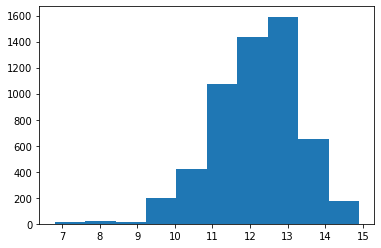

In [19]:
import matplotlib.pyplot as plt
plt.hist(y)

In [26]:
from sklearn.svm import SVR
parameters = {'kernel':('linear', 'poly', 'rbf', 'sigmoid'),
              'degree':[3, 4, 5],
             'C':[0.01, 0.1, 1.0]}

model = SVR()
clf = GridSearchCV(model, parameters, scoring='neg_root_mean_squared_error', n_jobs=9)
clf.fit(X, y)

GridSearchCV(estimator=SVR(), n_jobs=9,
             param_grid={'C': [0.01, 0.1, 1.0], 'degree': [3, 4, 5],
                         'kernel': ('linear', 'poly', 'rbf', 'sigmoid')},
             scoring='neg_root_mean_squared_error')

In [27]:
sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_degree',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [28]:
result = pd.DataFrame(clf.cv_results_)
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.46,0.29,0.11,0.03,0.01,3,linear,"{'C': 0.01, 'degree': 3, 'kernel': 'linear'}",-1.11,-1.09,-1.14,-1.11,-1.12,-1.11,0.02,14
1,0.98,0.15,0.14,0.03,0.01,3,poly,"{'C': 0.01, 'degree': 3, 'kernel': 'poly'}",-1.12,-1.09,-1.14,-1.11,-1.12,-1.12,0.02,22
2,1.36,0.18,0.24,0.05,0.01,3,rbf,"{'C': 0.01, 'degree': 3, 'kernel': 'rbf'}",-1.11,-1.09,-1.14,-1.11,-1.12,-1.12,0.02,17
3,1.57,0.22,0.28,0.04,0.01,3,sigmoid,"{'C': 0.01, 'degree': 3, 'kernel': 'sigmoid'}",-1.11,-1.10,-1.15,-1.12,-1.13,-1.12,0.02,26
4,2.47,0.33,0.13,0.02,0.01,4,linear,"{'C': 0.01, 'degree': 4, 'kernel': 'linear'}",-1.11,-1.09,-1.14,-1.11,-1.12,-1.11,0.02,14
5,1.04,0.12,0.15,0.02,0.01,4,poly,"{'C': 0.01, 'degree': 4, 'kernel': 'poly'}",-1.12,-1.10,-1.15,-1.11,-1.13,-1.12,0.02,24
6,1.42,0.14,0.26,0.04,0.01,4,rbf,"{'C': 0.01, 'degree': 4, 'kernel': 'rbf'}",-1.11,-1.09,-1.14,-1.11,-1.12,-1.12,0.02,17
7,1.51,0.23,0.26,0.04,0.01,4,sigmoid,"{'C': 0.01, 'degree': 4, 'kernel': 'sigmoid'}",-1.11,-1.10,-1.15,-1.12,-1.13,-1.12,0.02,26
8,2.45,0.31,0.12,0.03,0.01,5,linear,"{'C': 0.01, 'degree': 5, 'kernel': 'linear'}",-1.11,-1.09,-1.14,-1.11,-1.12,-1.11,0.02,14
9,1.08,0.13,0.16,0.03,0.01,5,poly,"{'C': 0.01, 'degree': 5, 'kernel': 'poly'}",-1.12,-1.10,-1.15,-1.12,-1.13,-1.12,0.02,29


In [40]:
result[result["rank_test_score"]<5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
34,0.02,0.00,0.00,0.00,1.00,3,rbf,"{'C': 1.0, 'degree': 3, 'kernel': 'rbf'}",-1.07,-1.08,-1.14,-1.02,-1.15,-1.09,0.05,1
38,0.03,0.00,0.00,0.00,1.00,4,rbf,"{'C': 1.0, 'degree': 4, 'kernel': 'rbf'}",-1.07,-1.08,-1.14,-1.02,-1.15,-1.09,0.05,1
42,0.03,0.00,0.00,0.00,1.00,5,rbf,"{'C': 1.0, 'degree': 5, 'kernel': 'rbf'}",-1.07,-1.08,-1.14,-1.02,-1.15,-1.09,0.05,1
46,0.03,0.00,0.00,0.00,1.00,6,rbf,"{'C': 1.0, 'degree': 6, 'kernel': 'rbf'}",-1.07,-1.08,-1.14,-1.02,-1.15,-1.09,0.05,1


In [ ]:
print("a")

In [ ]:
print("b")

In [ ]:
print("c")

In [ ]:
print("d")

# Lasso

In [31]:
from sklearn import linear_model

parameters = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03]}
model = linear_model.Lasso(max_iter=3000)
clf = GridSearchCV(model, parameters, scoring='neg_root_mean_squared_error')
clf.fit(X, y)


sorted(clf.cv_results_.keys())


['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_alpha',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [32]:
model.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])

In [33]:
result = pd.DataFrame(clf.cv_results_)
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.03,0.01,0.00,0.00,0.02,{'alpha': 0.02},-1.10,-1.09,-1.14,-1.11,-1.11,-1.11,0.02,5
1,0.02,0.00,0.00,0.00,0.02,{'alpha': 0.024},-1.10,-1.09,-1.14,-1.11,-1.11,-1.11,0.02,4
2,0.02,0.01,0.00,0.00,0.03,{'alpha': 0.025},-1.10,-1.09,-1.14,-1.11,-1.11,-1.11,0.02,3
3,0.02,0.00,0.00,0.00,0.03,{'alpha': 0.026},-1.10,-1.09,-1.14,-1.11,-1.11,-1.11,0.02,2
4,0.03,0.00,0.00,0.00,0.03,{'alpha': 0.03},-1.10,-1.09,-1.14,-1.11,-1.11,-1.11,0.02,1


# BayessianRidge

In [34]:
from sklearn import linear_model

parameters = {'lambda_1':[1e-6, 1e-5, 1e-4, 0.001, 0.01],
             'lambda_2':[1e-6, 1e-5, 1e-4, 0.001, 0.01],
}
model = linear_model.BayesianRidge()
clf = GridSearchCV(model, parameters, scoring='neg_root_mean_squared_error')
clf.fit(X, y)

sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_lambda_1',
 'param_lambda_2',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [35]:
result = pd.DataFrame(clf.cv_results_)
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_lambda_1,param_lambda_2,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.05,0.03,0.00,0.00,0.00,0.00,"{'lambda_1': 1e-06, 'lambda_2': 1e-06}",-1.10,-1.09,-1.14,-1.11,-1.11,-1.11,0.02,5
1,0.03,0.01,0.00,0.00,0.00,0.00,"{'lambda_1': 1e-06, 'lambda_2': 1e-05}",-1.10,-1.09,-1.14,-1.11,-1.11,-1.11,0.02,10
2,0.02,0.01,0.00,0.00,0.00,0.00,"{'lambda_1': 1e-06, 'lambda_2': 0.0001}",-1.10,-1.09,-1.14,-1.11,-1.11,-1.11,0.02,15
3,0.02,0.01,0.00,0.00,0.00,0.00,"{'lambda_1': 1e-06, 'lambda_2': 0.001}",-1.10,-1.09,-1.14,-1.11,-1.11,-1.11,0.02,20
4,0.02,0.01,0.00,0.00,0.00,0.01,"{'lambda_1': 1e-06, 'lambda_2': 0.01}",-1.10,-1.09,-1.14,-1.11,-1.11,-1.11,0.02,25
5,0.02,0.01,0.00,0.00,0.00,0.00,"{'lambda_1': 1e-05, 'lambda_2': 1e-06}",-1.10,-1.09,-1.14,-1.11,-1.11,-1.11,0.02,4
6,0.02,0.01,0.00,0.00,0.00,0.00,"{'lambda_1': 1e-05, 'lambda_2': 1e-05}",-1.10,-1.09,-1.14,-1.11,-1.11,-1.11,0.02,9
7,0.02,0.01,0.00,0.00,0.00,0.00,"{'lambda_1': 1e-05, 'lambda_2': 0.0001}",-1.10,-1.09,-1.14,-1.11,-1.11,-1.11,0.02,14
8,0.02,0.01,0.00,0.00,0.00,0.00,"{'lambda_1': 1e-05, 'lambda_2': 0.001}",-1.10,-1.09,-1.14,-1.11,-1.11,-1.11,0.02,19
9,0.05,0.04,0.00,0.00,0.00,0.01,"{'lambda_1': 1e-05, 'lambda_2': 0.01}",-1.10,-1.09,-1.14,-1.11,-1.11,-1.11,0.02,24


In [25]:
len(X)

5585